<a href="https://colab.research.google.com/github/asf72/selftry/blob/main/221002172_CSE412_222D3_LabPerformance07_kMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import requests

In [4]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [5]:
display(df.head())
df.info()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
print(df.iloc[0:5])

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [11]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [13]:
print(df.iloc[0:5,0:3])

   CustomerID  Gender  Age
0           1    Male   19
1           2    Male   21
2           3  Female   20
3           4  Female   23
4           5  Female   31


In [16]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
y = df[['Spending Score (1-100)']]

In [17]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [18]:
y.head()

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40


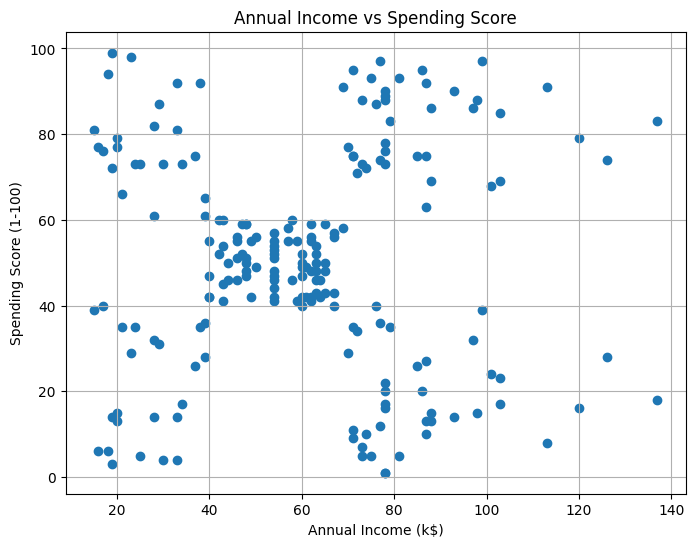

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

plt.figure (figsize =(8, 6))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [25]:
from sklearn.cluster import KMeans

Mall_Customers = KMeans(n_clusters =3)
Mall_Customers.fit(x)

KMeans(n_clusters=3)

In [27]:
print(Mall_Customers.predict(x))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [28]:
print(Mall_Customers.cluster_centers_)

[[44.15447154 49.82926829]
 [86.53846154 82.12820513]
 [87.         18.63157895]]


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

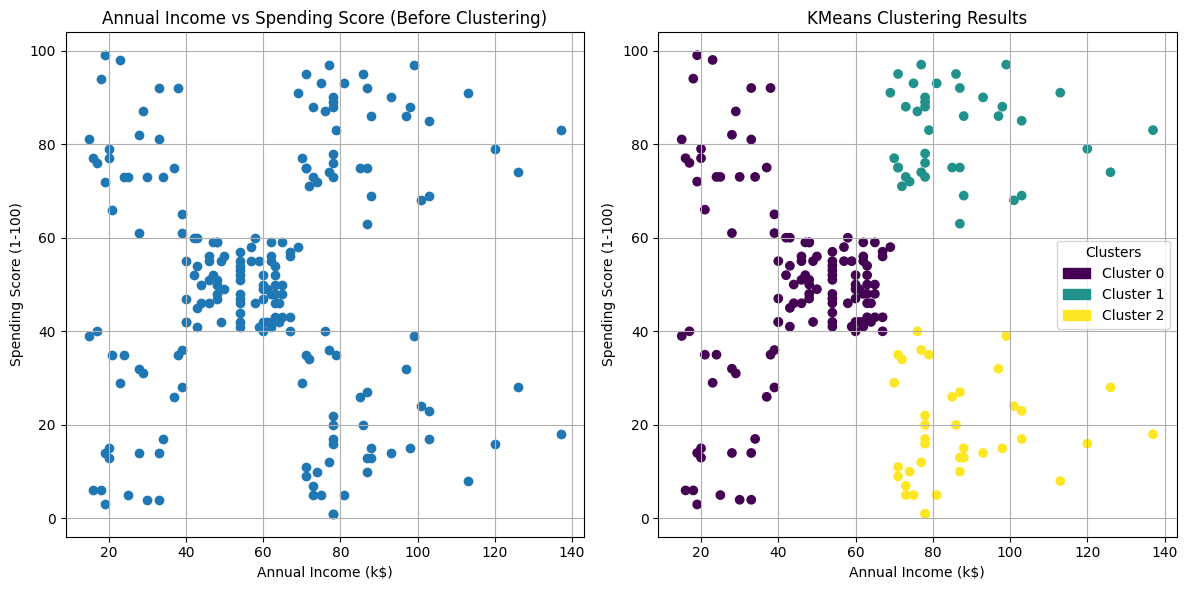

In [34]:
plt.figure(figsize =(12 ,6))
plt.subplot(1, 2, 1)
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score (Before Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=Mall_Customers.labels_, cmap='viridis') # Using a colormap
plt.title("KMeans Clustering Results")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
unique_labels = np.unique(Mall_Customers.labels_)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

legend_patches = []
for i, label in enumerate(unique_labels):
    patch = mpatches.Patch(color=colors[i], label=f'Cluster {label}')
    legend_patches.append(patch)

plt.legend(handles=legend_patches, title="Clusters")

plt.tight_layout()
plt.show()

In [37]:
df['Cluster'] = Mall_Customers.labels_
cluster_analysis = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'CustomerID': 'count'
}).reset_index()
cluster_analysis.rename(columns={'CustomerID': 'Number of Customers'}, level=1, inplace=True)
display(cluster_analysis)

Cluster        Age          ... Spending Score (1-100)         CustomerID
                mean min max  ...                   mean min max      count
0       0  40.325203  18  70  ...              49.829268   3  99        123
1       1  32.692308  27  40  ...              82.128205  63  97         39
2       2  40.394737  19  59  ...              18.631579   1  40         38

[3 rows x 11 columns]